In [ ]:
from derive_conceptualspace.evaluate.shallow_trees import classify_shallowtree
from derive_conceptualspace.pipeline import SnakeContext, load_envfiles
from derive_conceptualspace.pipeline import cluster_loader
from derive_conceptualspace.settings import DEFAULT_N_CPUS
from derive_conceptualspace.util.desc_object import DescriptionList
from derive_conceptualspace.util.result_analysis_tools import getfiles_allconfigs
from derive_conceptualspace.util.threadworker import WorkerPool
from misc_util.logutils import setup_logging
from misc_util.pretty_print import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
setup_logging()
load_envfiles("siddata")
configs, print_cnf = getfiles_allconfigs("clusters", verbose=True)

In [ ]:
N_CPUS = DEFAULT_N_CPUS-1
with WorkerPool(N_CPUS, pgbar="Fetching clusters..") as pool:
    get_featureaxes = lambda conf: ((ctx := SnakeContext.loader_context(config=conf, silent=True)).get_important_settings(), ctx.load("clusters"), conf)
    perconf_list, interrupted = pool.work(configs, get_featureaxes)

In [ ]:
print("Number of clusters per configs:", [len(x[1]["clusters"]) for x in perconf_list])
display("Taking one of the configs with the most clusters...")
settings_str, clusters, conf = max(perconf_list, key=lambda x: len(x[1]["clusters"]))
display(settings_str[1])
display("Loading the rest of the necessary config...")
ctx, (embedding, descriptions) = (ctx := SnakeContext.loader_context(config=conf, silent=True)), ctx.load("embedding", "pp_descriptions")
display("loading done.")

Dropping 4623/11942 (38.71%) courses - there is no Fachbereich for them
64 courses are assigned more than 1 Fachbereich!


derive_conceptualspace/load_data/dataset_specifics/siddata2022.py:38: UserWarning: Will return the first Fachbereich for those ambiguous courses!


<span style="font-size:11pt">Using classes from fachbereich - 7319/11942 entities have a class</span>

<span style="font-size:11pt">Highest-ranking descriptions [with any class] per dimension:<br>    <span style="color: #0000ff">daran anschliessend    </span>: Karl Barth-Tagung 2019: "Von Gott reden!"<br>    <span style="color: #0000ff">bewerber               </span>: Web Publishing<br>    <span style="color: #0000ff">formel                 </span>: Aktuelle Beispielanalysen zur Kulturvermittlung in den Printmedien (Tageszeitung, Wochenzeitung, Magazin) (NDL4/5, LbSb)<br>    <span style="color: #0000ff">800                    </span>: Exkursion Flandern (14.-19.9.2009): Brüssel, Gent, Antwerpen und Leuven<br>    <span style="color: #0000ff">sprache                </span>: Gesprochene und geschriebene Sprache (B1, B2)<br>    <span style="color: #0000ff">turnen                 </span>: Interkulturelle Kompetenz – aufgezeigt anhand der Zielkulturen China und Indien<br>    <span style="color: #0000ff">2021 16                </span>: Einführungsveranstaltung: Vorbereitungsseminar „… damit ihr einander kennenlernt“ (Sure 49,13) Interreligiöse Studientage vom 29.-30.03.2021 in Goslar (Bezugsmodul: Interreligiöse und interkulturelle Studien)<br>    <span style="color: #0000ff">kologisch              </span>: Strafvollzug<br>    <span style="color: #0000ff">programmiersprache     </span>: Informatik A: Algorithmen<br>    <span style="color: #0000ff">audiovisuell           </span>: Medien und Gesellschaft, Teil 1<br>    <span style="color: #0000ff">anrechenbar            </span>: Lehre und Lernen von Kompetenzen in modularisierten Studiengängen, Hochschuldidaktische Qualifizierung (Modul II, Teil 2)<br>    <span style="color: #0000ff">arbeitsaufgabe         </span>: Grundlehre Design - Gestaltung, Information, Kommunikation<br>    <span style="color: #0000ff">einfuhrung allgemein   </span>: Strafrecht I, 1. Sem. Dipl. u. 1. Sem. LL.M. Dt. Recht)<br>    <span style="color: #0000ff">kommunikationsstrategie</span>: "Alt ist der, der aufhört neugierig zu sein" (Irisches Sprichwort) Perspektiven und Entwicklung im Beruf ab dem 50. Lebensjahr<br>    <span style="color: #0000ff">gebet                  </span>: Kongress "Frauen in kirchlichen Ämtern"<br>    <span style="color: #0000ff">erfindung              </span>: Material und Methoden II (Grundmodul Einführung in textile Sachverhalte, Methoden und Kontexte)<br>    <span style="color: #0000ff">aktivierung studierend </span>: Grundkurs Spanisch II (Gruppe A)<br>    <span style="color: #0000ff">madchen                </span>: Essstörungen, Sexualität und Selbstinszenierung: Die Aneignung des Körpers als Entwicklungsaufgabe in der weiblichen Adoleszenz<br>    <span style="color: #0000ff">au szlig erde          </span>: Vorlesung: System Lebewesen/Ökozonen<br>    <span style="color: #0000ff">mitbestimmung          </span>: Recht der Unternehmensmitbestimmung, ab 5. Sem. Dipl. WPF SP 2 u. 6. Sem. LL.B. PB 3 (nur 2. Semesterhälfte)</span>

<span style="font-size:11pt">Labels (10 classes): <span style="color: #0000ff">Sprache</span>: 1719, <span style="color: #0000ff">Erziehung/Kultur</span>: 2081, <span style="color: #0000ff">Kultur/Geo</span>: 1473, <span style="color: #0000ff">Sozial</span>: 707, <span style="color: #0000ff">Rechtswiss</span>: 350, <span style="color: #0000ff">Humanwiss</span>: 384, <span style="color: #0000ff">Bio/Chemie</span>: 166, <span style="color: #0000ff">Mathe/Info</span>: 186, <span style="color: #0000ff">Physik</span>: 147, <span style="color: #0000ff">Wiwi</span>: 106</span>

<span style="font-size:11pt">Eval-Settings: type: <span style="color: #0000ff">one-vs-rest</span>, DT-Depth: <span style="color: #0000ff">1</span>, train-test-split:<span style="color: #0000ff"> 33.0% in test-set </span></span>

Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.
Some nodes will be renamed.


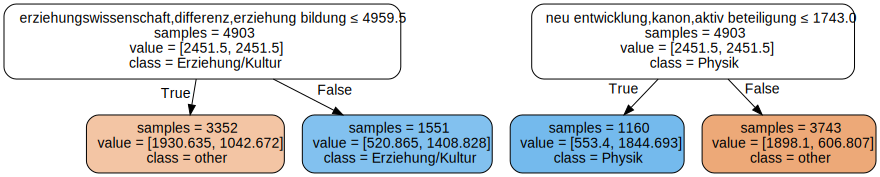

<span style="font-size:11pt"><br><br></span>

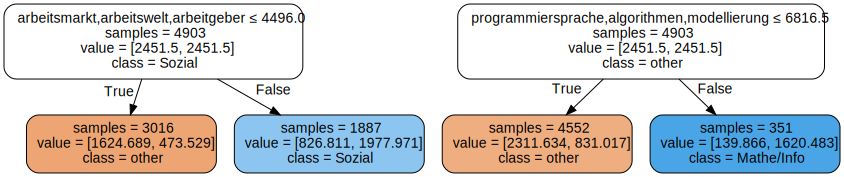

<span style="font-size:11pt"><br><br></span>

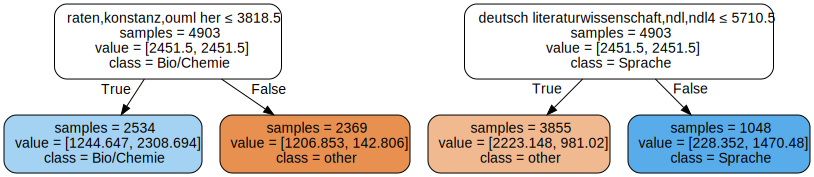

<span style="font-size:11pt"><br><br></span>

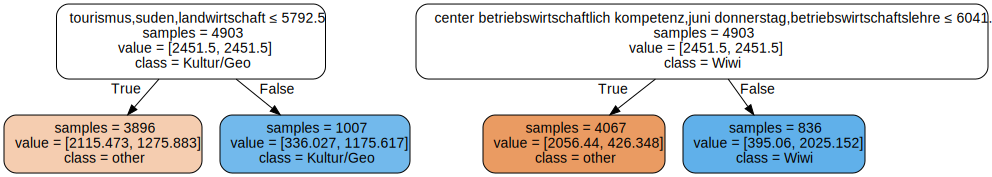

<span style="font-size:11pt"><br><br></span>

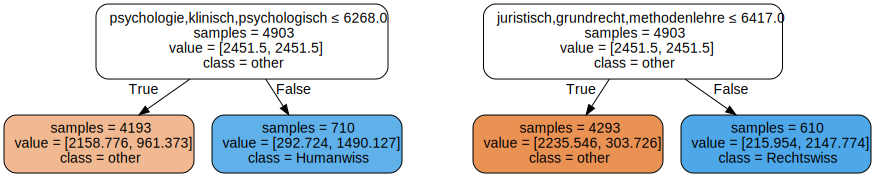

<span style="font-size:11pt"><br><br></span>

<span style="font-size:11pt">Per-Class-Scores: Erziehung/Kultur: 0.70, Physik: 0.77, Sozial: 0.66, Mathe/Info: 0.94, Bio/Chemie: 0.49, Sprache: 0.83, Kultur/Geo: 0.79, Wiwi: 0.82, Humanwiss: 0.87, Rechtswiss: 0.92</span>

<span style="font-size:11pt">Unweighted Mean Accuracy: 77.93%</span>

<span style="font-size:11pt">Weighted Mean Accuracy: 76.90%</span>

In [ ]:
# res = classify_shallowtree_multi(clusters, embedding, descriptions, ctx.obj["dataset_class"], verbose=True)
res = classify_shallowtree(clusters, embedding, descriptions, ctx.obj["dataset_class"], one_vs_rest=True, dt_depth=1, test_percentage_crossval=0.33, 
                           classes="fachbereich", verbose=True, return_features=False, balance_classes=True, do_plot=True)